# Análisis
Se cargan modulos y paquetes y se realiza el tratamiento de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import sys
sys.path.insert(0,'../utils')

import constants as cons
import funciones as funtils

df_gamepass = pd.read_csv(cons.DF_GAMEPASS_SRC)
df_gamepass = df_gamepass.drop(columns=[cons.RATIO, cons.TRUE_ACHIVEMENTS, cons.GAME_SCORE])
df_gamepass[cons.GAMERS] = pd.to_numeric(df_gamepass[cons.GAMERS].str.replace(',', ''), errors='coerce')
df_gamepass = df_gamepass[df_gamepass[cons.GAMERS] != 0]
df_gamepass[cons.TIME] = df_gamepass[cons.TIME].apply(funtils.calculate_mean_time)

df_metacritic = pd.read_csv(cons.DF_METACRITIC_SRC)
df_metacritic = df_metacritic.drop(columns=[cons.ID, cons.PLATFORM, cons.SORT_NO, cons.SUMMARY])

df_metacritic[cons.TITLE] = df_metacritic[cons.TITLE].str.lower()
df_gamepass[cons.GAME] = df_gamepass[cons.GAME].str.lower()
df_merged = pd.merge(df_metacritic, df_gamepass, left_on='title', right_on=cons.GAME, how='inner')
df_merged = df_merged.drop_duplicates()
df_merged = df_merged.sort_values(by=[cons.USER_SCORE, cons.COMP, cons.METASCORE], ascending=False).drop_duplicates(subset=cons.TITLE, keep='first')

df_merged = df_merged[df_merged[cons.GAMERS] >= 1000]
median_time = df_merged[cons.TIME].median()
df_merged[cons.TIME].fillna(median_time, inplace=True)

df_merged = df_merged.drop(columns=[cons.ADDED, cons.RELEASE_DATE, cons.GAME])
df_merged[cons.USER_SCORE] = df_merged[cons.USER_SCORE].apply(lambda x: 0 if not x.replace('.', '', 1).isdigit() else x)
df_merged[cons.USER_SCORE] = pd.to_numeric(df_merged[cons.USER_SCORE])

df_merged.rename(columns={cons.RATING: cons.XBOX, cons.USER_SCORE: cons.METACRITIC_USER_SCORE}, inplace=True)

df_merged['xbox_user_score'] = df_merged['xbox_user_score'] * 20
df_merged['metacritic_user_score'] = df_merged['metacritic_user_score'] * 10
df_merged['metascore'] = df_merged['metascore'].astype(float)
df_merged.reset_index(drop=True, inplace=True)

numeric_columns = df_merged.select_dtypes(include=[np.number]).columns
df_merged[cons.METACRITIC_USER_SCORE_CAT] = funtils.categorize_score(df_merged[cons.METACRITIC_USER_SCORE], cons.CAT_BINS, cons.CAT_VALS)
df_merged[cons.XBOX_USER_SCORE_CAT] = funtils.categorize_score(df_merged[cons.XBOX], cons.CAT_BINS, cons.CAT_VALS)
df_merged[cons.METASCORE_CAT] = funtils.categorize_score(df_merged[cons.METASCORE], cons.CAT_BINS, cons.CAT_VALS)


C:\Users\PC ELITE\AppData\Local\Temp\ipykernel_5808\1215318313.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[cons.TIME].fillna(median_time, inplace=True)


Listo, ahora se continua desde donde lo dejamos

## Análisis Multivariante

En base a los  análisis previos, se hará analisis multivariante entre número de jugadores, porcentaje de  completado y tiempo de cada título con cada valoración categórica.

### Número de jugadores vs porcentaje de jugadores que han completado el título

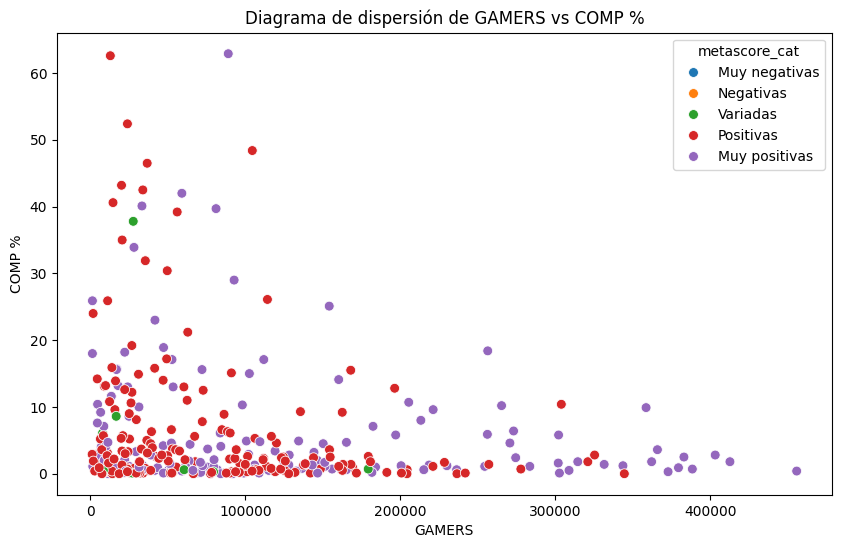

In [2]:
funtils.plot_scatter(df_merged, cons.GAMERS, cons.COMP, cons.METASCORE_CAT)

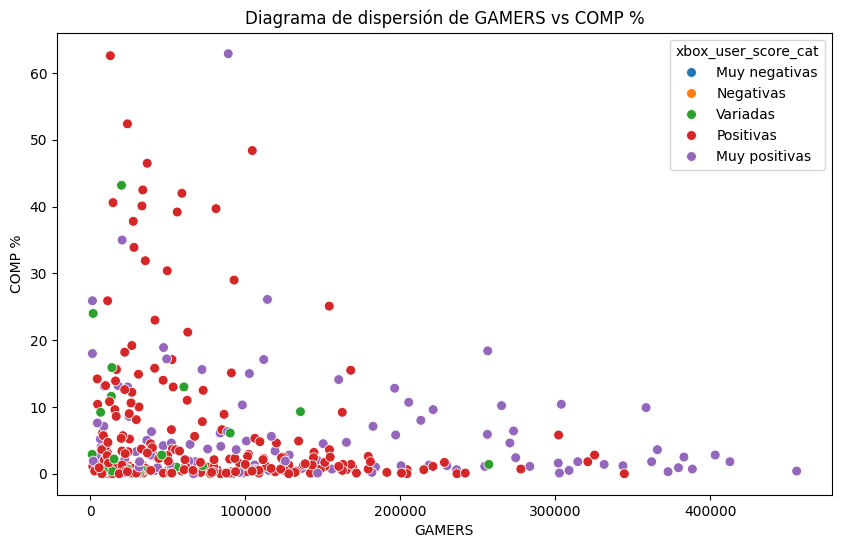

In [3]:
funtils.plot_scatter(df_merged, cons.GAMERS, cons.COMP, cons.XBOX_USER_SCORE_CAT)

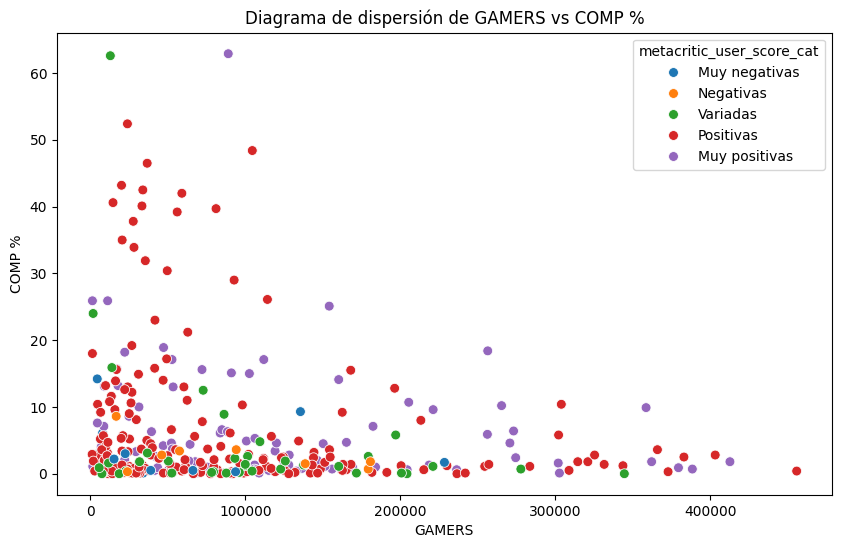

In [4]:
funtils.plot_scatter(df_merged, cons.GAMERS, cons.COMP, cons.METACRITIC_USER_SCORE_CAT)

### Número de jugadores vs tiempo medio  para completar el título

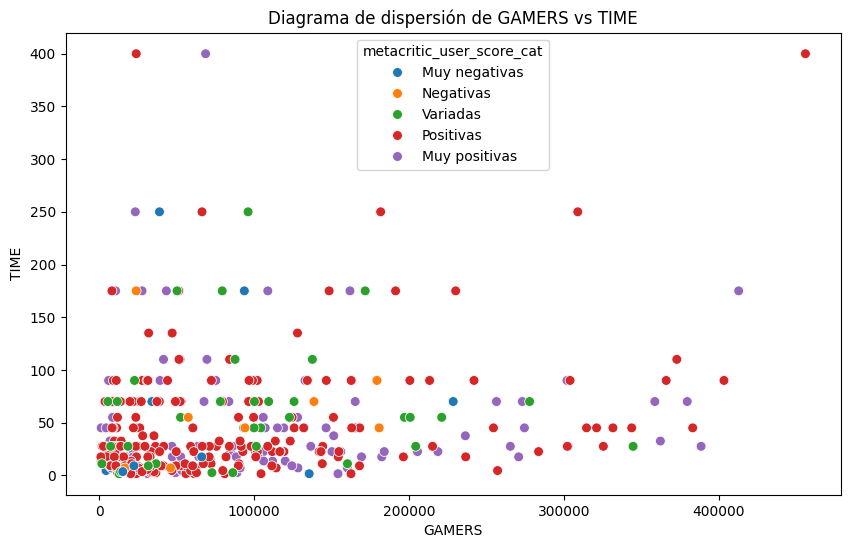

In [5]:
funtils.plot_scatter(df_merged, cons.GAMERS, cons.TIME, cons.METACRITIC_USER_SCORE_CAT)

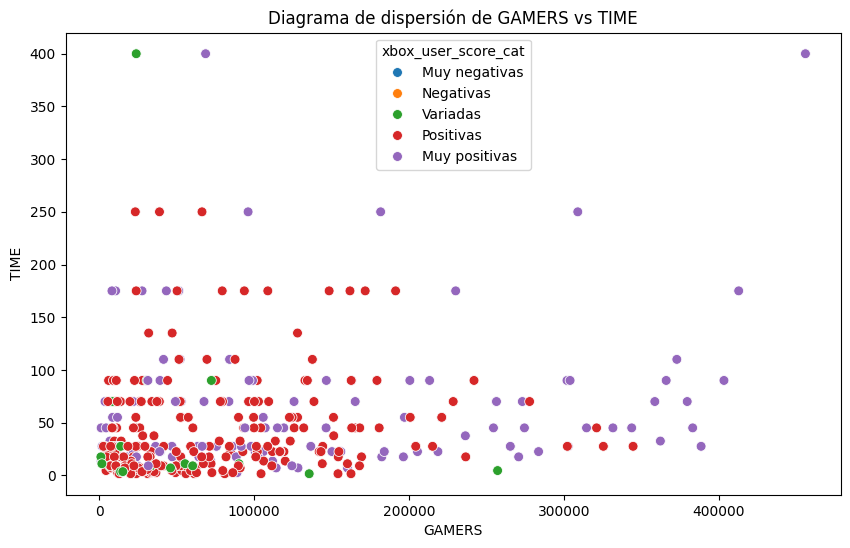

In [6]:
funtils.plot_scatter(df_merged, cons.GAMERS, cons.TIME, cons.XBOX_USER_SCORE_CAT)

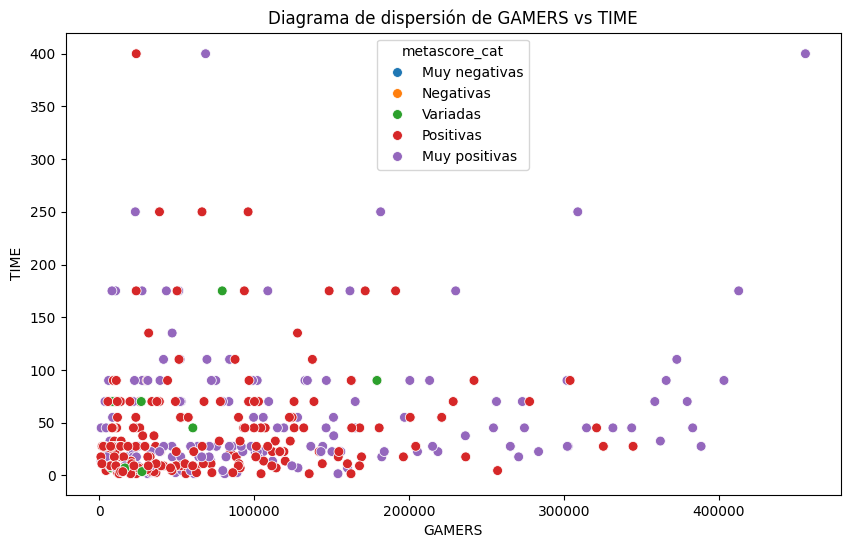

In [7]:
funtils.plot_scatter(df_merged, cons.GAMERS, cons.TIME, cons.METASCORE_CAT)

### Tiempo medio para completar el título vs porcentaje para completarlo

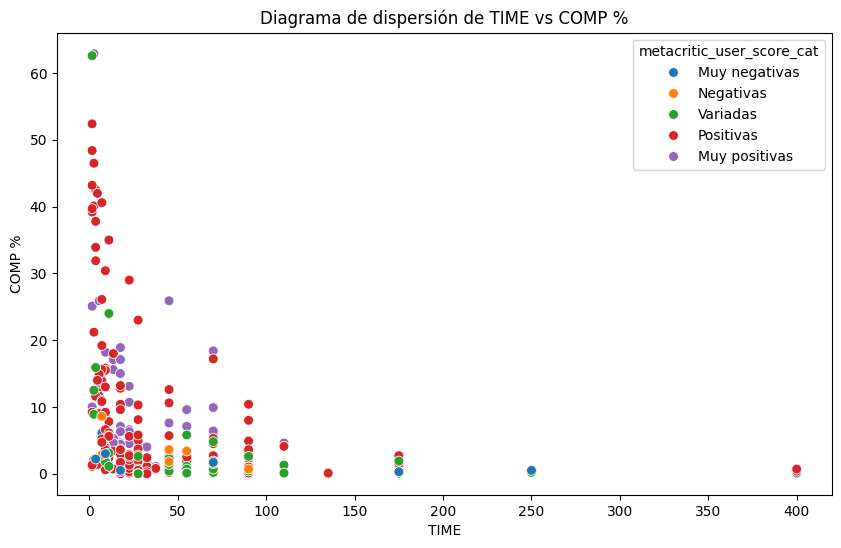

In [8]:
funtils.plot_scatter(df_merged,  cons.TIME, cons.COMP, cons.METACRITIC_USER_SCORE_CAT)

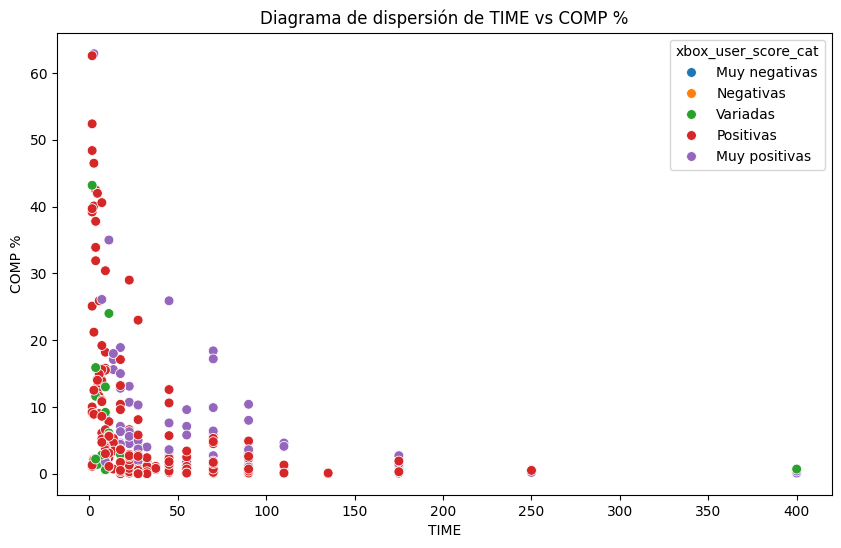

In [9]:
funtils.plot_scatter(df_merged,  cons.TIME, cons.COMP, cons.XBOX_USER_SCORE_CAT)

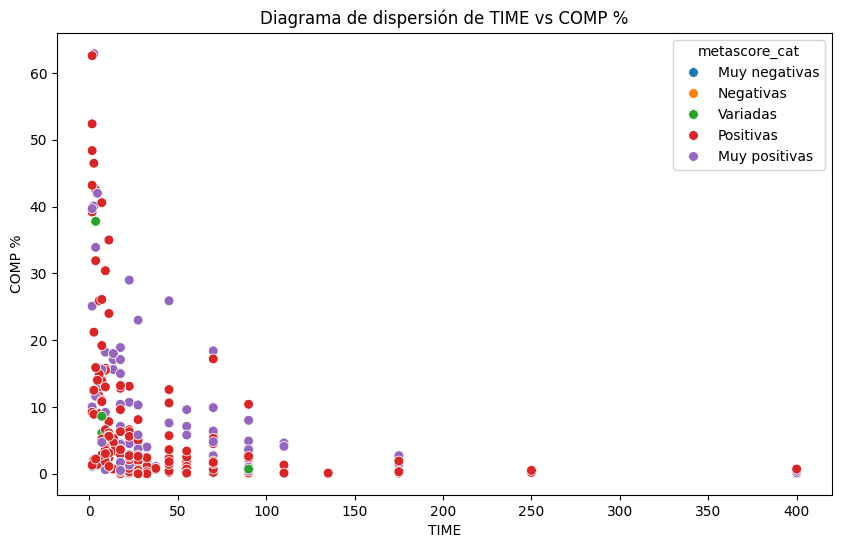

In [10]:
funtils.plot_scatter(df_merged,  cons.TIME, cons.COMP, cons.METASCORE_CAT)

Para tener el análisis completo, se hace el análisis entre las tres variables numéricas

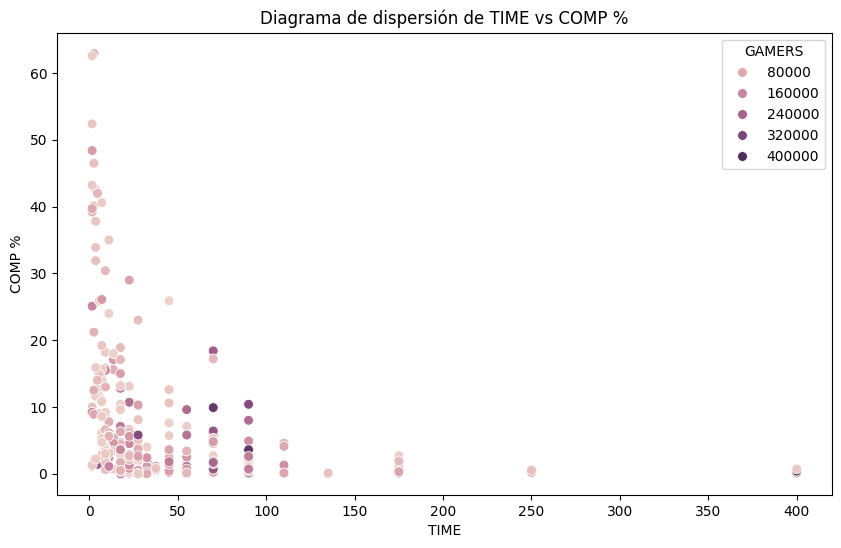

In [11]:
funtils.plot_scatter(df_merged, cons.TIME, cons.COMP, cons.GAMERS)

Del análisis multivariante, se concluye:
* La valoración de usuarios de Xbox y críticos de Metacritic influye en el número de jugadores que juegan cada título, así como en  el porcentaje de completado. Sin embargo, no necesariamentte significa que vayan a completar los títulos de larga duración.
* Los  jugadores prefieren juegos que duren  menos de 100 horas y eso  influye en si los jugadores terminan o se acercan a completar el título.